In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from typing import TypedDict, Annotated

from langgraph.graph import StateGraph, add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver

from langchain_openai import ChatOpenAI

from langchain_community.tools import TavilySearchResults

In [3]:
# 메모리
memory = MemorySaver()

# tool
tool = TavilySearchResults(max_results=2)
tools = [tool]
tool_node = ToolNode(tools)

# llm
llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_tools = llm.bind_tools(tools)

In [4]:
# 클래스 정의
class State(TypedDict):
    messages: Annotated[list, add_messages]


# 챗봇 함수 정의
def chatbot(state:State):
    result = llm_with_tools.invoke(state["messages"])
    return {"messages": [result]}


In [5]:
# 그래프 만들기
graph_builder = StateGraph(State)

# 노드
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", tool_node)

# 엣지
graph_builder.add_edge("chatbot", "tools")
#graph_builder.add_edge("tools", "chatbot")

graph_builder.add_conditional_edges("chatbot", tools_condition)

graph_builder.set_entry_point("chatbot")

graph = graph_builder.compile(checkpointer=memory)

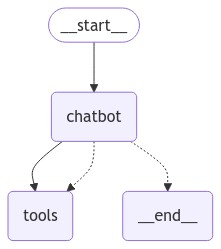

In [6]:
# 그래프 그림 그리기
from IPython.display import display, Image
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass


In [7]:
config = {"configurable": {"thread_id": "jaeho"}}
graph.invoke({"messages": [{"role": "user", "content": "안녕 난 재호야. 나는 진원이랑 결혼할거야"}]},
             config)

{'messages': [HumanMessage(content='안녕 난 재호야. 나는 진원이랑 결혼할거야', id='cbd4d833-7213-4e8d-a01d-efc0feef720c'),
  AIMessage(content='안녕하세요, 재호님! 진원이와 결혼하게 되신 것을 축하드립니다! 두 분의 행복한 미래를 기원합니다. 결혼 준비는 잘 하고 계신가요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 95, 'total_tokens': 138, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-df7d1e27-ae0c-4418-8323-0f0664ec2225-0', usage_metadata={'input_tokens': 95, 'output_tokens': 43, 'total_tokens': 138})]}

In [8]:
config = {"configurable": {"thread_id": "jaeho"}}
graph.invoke({"messages": [{"role": "user", "content": "내 첫번째 질문이 뭐였어?"}]},
             config)

{'messages': [HumanMessage(content='안녕 난 재호야. 나는 진원이랑 결혼할거야', id='cbd4d833-7213-4e8d-a01d-efc0feef720c'),
  AIMessage(content='안녕하세요, 재호님! 진원이와 결혼하게 되신 것을 축하드립니다! 두 분의 행복한 미래를 기원합니다. 결혼 준비는 잘 하고 계신가요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 95, 'total_tokens': 138, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-df7d1e27-ae0c-4418-8323-0f0664ec2225-0', usage_metadata={'input_tokens': 95, 'output_tokens': 43, 'total_tokens': 138}),
  HumanMessage(content='내 첫번째 질문이 뭐였어?', id='b581c346-b482-4b23-a371-a242e3bfb4b4'),
  AIMessage(content='당신의 첫 번째 질문은 "안녕 난 재호야. 나는 진원이랑 결혼할거야"였습니다. 결혼 소식을 전해주셔서 감사합니다!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 154, 'total_tokens': 193, 'completion_tokens_details': {'reasonin

In [9]:
config = {"configurable": {"thread_id": "jaeho"}}
graph.invoke({"messages": [{"role": "user", "content": "내 두번째 질문이 뭐였어?"}]},
             config)

{'messages': [HumanMessage(content='안녕 난 재호야. 나는 진원이랑 결혼할거야', id='cbd4d833-7213-4e8d-a01d-efc0feef720c'),
  AIMessage(content='안녕하세요, 재호님! 진원이와 결혼하게 되신 것을 축하드립니다! 두 분의 행복한 미래를 기원합니다. 결혼 준비는 잘 하고 계신가요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 95, 'total_tokens': 138, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-df7d1e27-ae0c-4418-8323-0f0664ec2225-0', usage_metadata={'input_tokens': 95, 'output_tokens': 43, 'total_tokens': 138}),
  HumanMessage(content='내 첫번째 질문이 뭐였어?', id='b581c346-b482-4b23-a371-a242e3bfb4b4'),
  AIMessage(content='당신의 첫 번째 질문은 "안녕 난 재호야. 나는 진원이랑 결혼할거야"였습니다. 결혼 소식을 전해주셔서 감사합니다!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 154, 'total_tokens': 193, 'completion_tokens_details': {'reasonin

In [10]:
config = {"configurable": {"thread_id": "jaeho"}}
graph.invoke({"messages": [{"role": "user", "content": "현재 마이크로소프트 주식은 얼마야?"}]},
             config)

{'messages': [HumanMessage(content='안녕 난 재호야. 나는 진원이랑 결혼할거야', id='cbd4d833-7213-4e8d-a01d-efc0feef720c'),
  AIMessage(content='안녕하세요, 재호님! 진원이와 결혼하게 되신 것을 축하드립니다! 두 분의 행복한 미래를 기원합니다. 결혼 준비는 잘 하고 계신가요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 95, 'total_tokens': 138, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-df7d1e27-ae0c-4418-8323-0f0664ec2225-0', usage_metadata={'input_tokens': 95, 'output_tokens': 43, 'total_tokens': 138}),
  HumanMessage(content='내 첫번째 질문이 뭐였어?', id='b581c346-b482-4b23-a371-a242e3bfb4b4'),
  AIMessage(content='당신의 첫 번째 질문은 "안녕 난 재호야. 나는 진원이랑 결혼할거야"였습니다. 결혼 소식을 전해주셔서 감사합니다!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 154, 'total_tokens': 193, 'completion_tokens_details': {'reasonin

In [11]:
config = {"configurable": {"thread_id": "1"}}
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}, config):
        for value in event.values():
            print("User: ", user_input)
            print("Assistant: ", value["messages"][-1].content) #value값만 들어가있다.

User:  안녕
Assistant:  안녕하세요! 어떻게 도와드릴까요?
User:  안녕


IndexError: list index out of range

In [14]:
snapshot = graph.get_state(config)
snapshot

StateSnapshot(values={'messages': [HumanMessage(content='현재 날씨 알려줘', id='9825e896-f699-43ea-96c3-e662f4a45937'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_qdh8AkHv5ZarHe288JFwn2tE', 'function': {'arguments': '{"query":"현재 날씨"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 84, 'total_tokens': 104, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-26bc5a92-0f36-44a6-8f41-6fb66b339fbe-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': '현재 날씨'}, 'id': 'call_qdh8AkHv5ZarHe288JFwn2tE', 'type': 'tool_call'}], usage_metadata={'input_tokens': 84, 'output_tokens': 20, 'total_tokens': 104}), ToolMessage(content='[{"url": "https://weather.naver.com/", "content": "\\ub124\\uc774\\ubc84 \\ub0a0\\uc528\

# 기억할 메세지 개수 제한하기

In [23]:
# 메세지를 리스트로 받았을때 2개만 받기. 이 함수를 chatbot에 넣어서 최근 2개만 기억하도록 한다.
def filter_messages(messages: list):
    return messages[-2:]

def chatbot(state: State):
    messages = filter_messages(state['messages'])
    result = llm_with_tools.invoke(messages)
    return {"messages": [result]}

graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", tool_node)

graph_builder.add_edge("tools", "chatbot")
graph_builder.add_conditional_edges("chatbot", tools_condition)

graph_builder.set_entry_point("chatbot")

graph = graph_builder.compile(checkpointer=memory)

In [ ]:
config = {"configurable": {"thread_id": "20"}}
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}, config):
        for value in event.values():
            print("User: ", user_input)
            print("Assistant: ", value["messages"][-1].content) #value값만 들어가있다.

In [26]:
config = {"configurable": {"thread_id": "10"}}
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}, config):
        for value in event.values():
            print("User: ", user_input)
            print("Assistant: ", value["messages"][-1].content) #value값만 들어가있다.

User:  안녕 내이름은 재호야. 내 취미는 컴퓨터야
Assistant:  안녕하세요, 재호님! 컴퓨터에 대한 취미가 있으시군요. 어떤 부분의 컴퓨터에 관심이 있으신가요? 예를 들어, 프로그래밍, 게임, 하드웨어, 소프트웨어 등 다양한 분야가 있을 텐데요.
User:  내 이름이 뭐라고?
Assistant:  재호님이라고 말씀하셨습니다! 맞나요?
User:  내 이름이 뭐라고?
Assistant:  죄송합니다, 제가 이전에 언급한 "재호님"은 잘못된 정보였습니다. 당신의 이름은 알려주지 않으셨습니다. 이름을 말씀해 주시면 그에 맞춰 대화할 수 있습니다!
User:  내 이름은 재호여
Assistant:  반갑습니다, 재호님! 어떻게 도와드릴까요?
User:  내 이름이 뭐라고?
Assistant:  재호님이라고 하셨습니다! 다른 질문이나 도움이 필요하신 부분이 있으신가요?
User:  내 이름이 뭐라고?
Assistant:  당신의 이름은 재호님입니다. 다른 질문이 있으시면 말씀해 주세요!
User:  내 이름이 뭐라고?
Assistant:  당신의 이름은 재호님입니다.
User:  내 취미가 뭐라고?
Assistant:  당신의 취미는 무엇인지 알려주지 않으셨습니다. 취미에 대해 말씀해 주시면 더 많은 정보를 제공해 드릴 수 있습니다!
User:  내 이름은 재호야 내 취미는 컴퓨터야
Assistant:  안녕하세요, 재호님! 컴퓨터에 대한 취미는 정말 흥미롭네요. 컴퓨터에 관련된 어떤 부분을 특히 좋아하시나요? 예를 들어, 프로그래밍, 게임, 하드웨어, 소프트웨어 개발 등 어떤 분야에 관심이 있으신가요?
User:  내 취미는 뭐라고?
Assistant:  재호님의 취미는 컴퓨터와 관련된 것이라고 말씀하셨습니다. 더 구체적으로 어떤 부분에 관심이 있으신지 궁금합니다. 예를 들어, 프로그래밍, 게임, 하드웨어, 소프트웨어 개발 등 다양한 분야가 있을 수 있습니다. 어떤 분야가 가장 매력적으로 느껴지시나요?
User:  내 이름이 뭐라고?
Assistant:

In [29]:
config = {"configurable": {"thread_id": "15"}}

while True:
    user_input = input("User: ")
    if user_input.lower() in ["exit", "quit", "q"]:
        print("GoodBye")
        break
    for envent in graph.stream({"messages": ("user", user_input)}, config):
        for value in event.values():
            print("User_input: ", user_input)
            print("Assistant: ", value["messages"][-1].content)


User_input:  안녕
Assistant:  안녕하세요! 어떻게 도와드릴까요? 질문이나 궁금한 점이 있다면 말씀해 주세요.
GoodBye


In [31]:
config = {"configurable": {"thread_id": "15"}}

while True:
    user_input = input("User: ")
    if user_input.lower() in ["exit", "quit", "q"]:
        print("GoodBye")
        break
    for envent in graph.stream({"messages": ("user", user_input)}, config):
        for value in event.keys():
            print("User_input: ", user_input)
            print("Assistant: ", value)


User_input:  안녕
Assistant:  chatbot
User_input:  안녕
Assistant:  chatbot
GoodBye
